# IRIS FLOWER CLASSIFICATION


!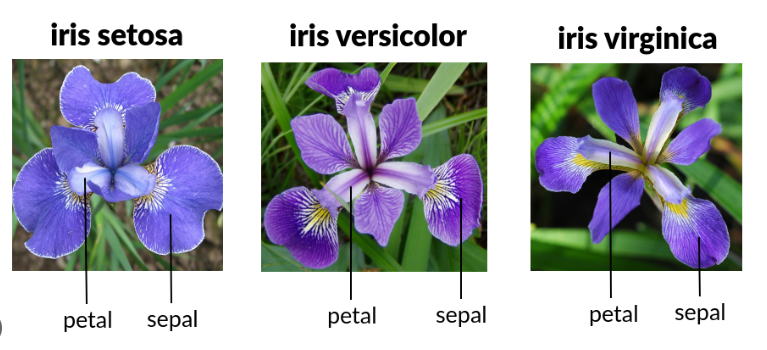

### Task - Train a machine learning model that can learn from these measurements and accurately classify the Iris flowers into their respective species.

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
!

In [3]:
# read data set

df = pd.read_csv(r"E:\Projects\Codsoft_Projects\Iris_Flower_Classification\IRIS.csv")
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


!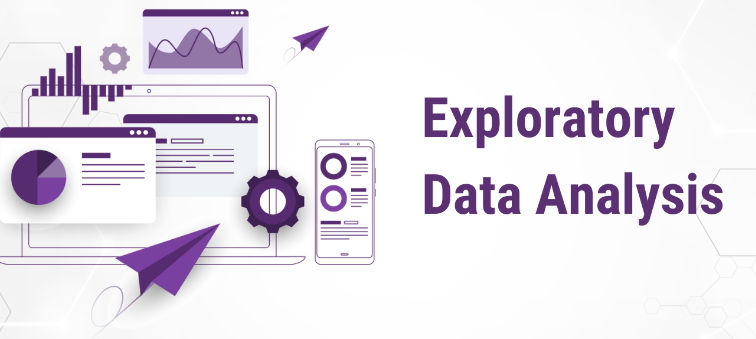

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.shape

(150, 5)

In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# Checking the null values with their sum 

df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

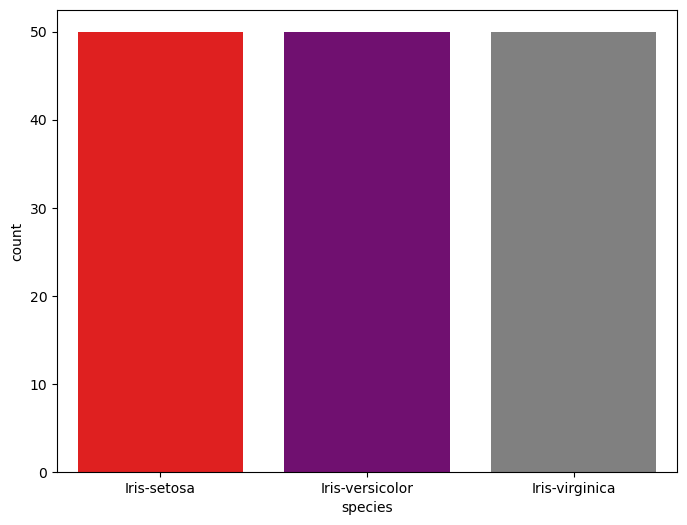

In [8]:
plt.figure(figsize=(8, 6))
colors = ['red', 'purple', 'gray']
sns.countplot(x='species', data=df, palette=colors)

plt.show()

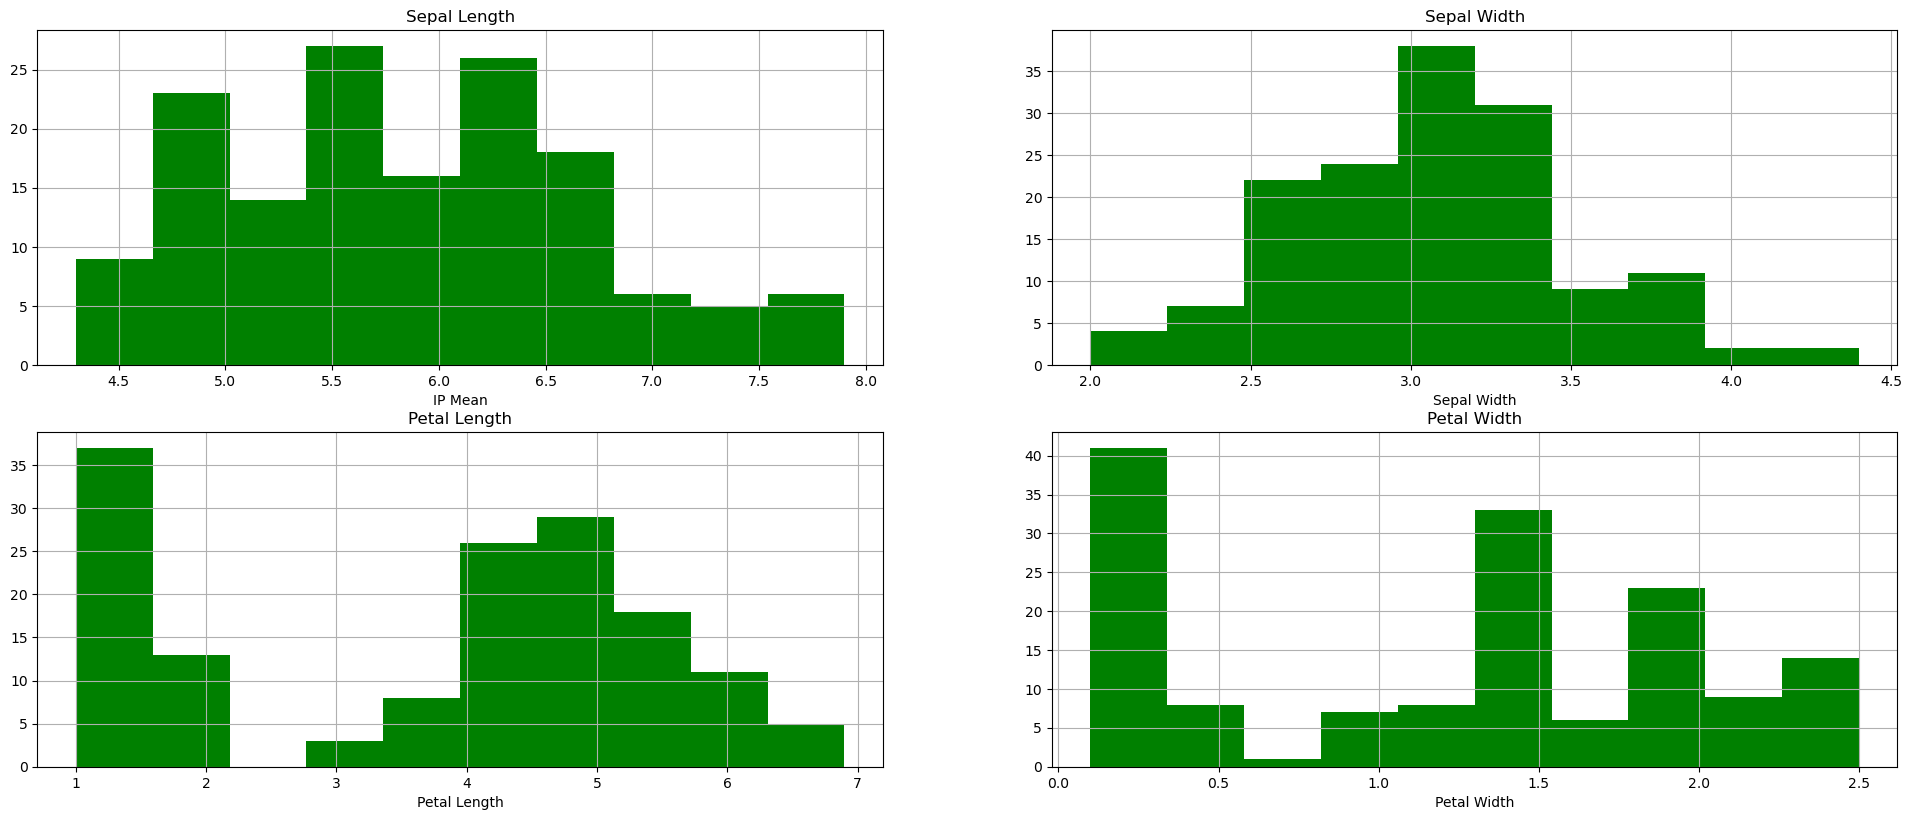

In [9]:
plt.figure(figsize=(24, 20))

# Subplot 1
plt.subplot(4, 2, 1)
fig = df['sepal_length'].hist(bins=10, color='green')  # Set the color to green
fig.set_xlabel('IP Mean')
fig.set_title('Sepal Length')

# Subplot 2
plt.subplot(4, 2, 2)
fig = df['sepal_width'].hist(bins=10, color='green')
fig.set_xlabel('Sepal Width')
fig.set_title('Sepal Width')

# Subplot 3
plt.subplot(4, 2, 3)
fig = df['petal_length'].hist(bins=10, color='green')
fig.set_xlabel('Petal Length')
fig.set_title('Petal Length')

# Subplot 4
plt.subplot(4, 2, 4)
fig = df['petal_width'].hist(bins=10, color='green')
fig.set_xlabel('Petal Width')
fig.set_title('Petal Width')

plt.show()

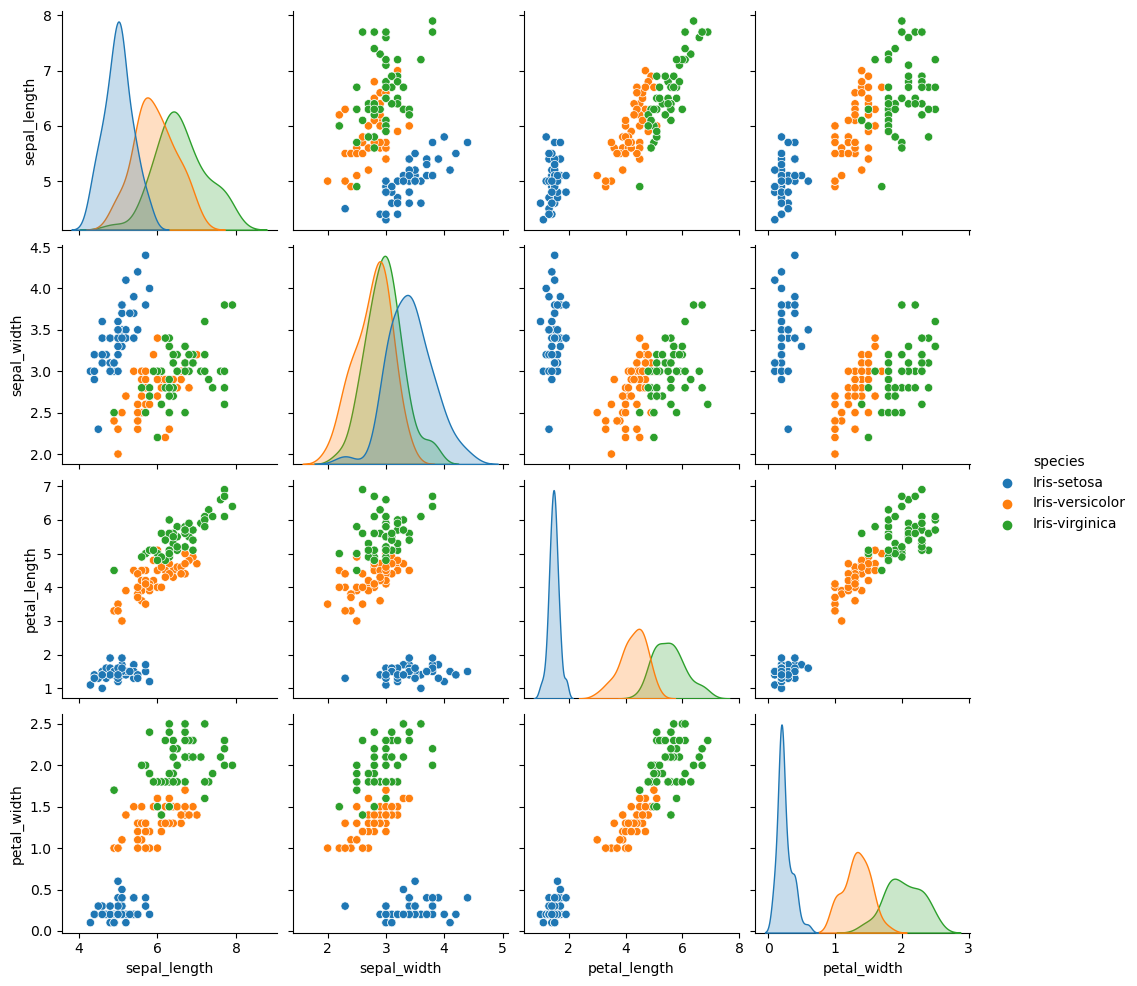

In [10]:
sns.pairplot(df,hue='species')

In [11]:
df['width_zscore']=(df.sepal_width-df.sepal_width.mean())/df.sepal_width.std()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,width_zscore
0,5.1,3.5,1.4,0.2,Iris-setosa,1.028611
1,4.9,3.0,1.4,0.2,Iris-setosa,-0.124540
2,4.7,3.2,1.3,0.2,Iris-setosa,0.336720
3,4.6,3.1,1.5,0.2,Iris-setosa,0.106090
4,5.0,3.6,1.4,0.2,Iris-setosa,1.259242


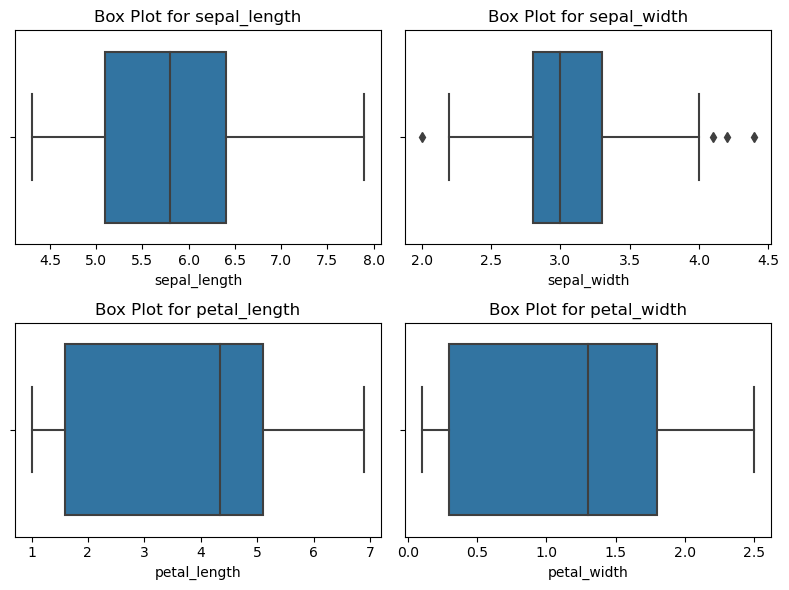

In [12]:
columns_to_plot = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Create subplots using a for loop
plt.figure(figsize=(8, 6))
for i, column in enumerate(columns_to_plot, start=1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot for {column}')

plt.tight_layout()
plt.show()

In [13]:
# Now we will check all the outliers in these 4 columns
data_1 = df[['sepal_length','sepal_width','petal_length','petal_width']]

# Creating a new dataframe 
data_1 = pd.DataFrame(data_1)

# Calculate mean and standard deviation for all columns
means = data_1.mean()
stds = data_1.std()

# Calculate Z-scores for all columns
z_scores = (df - means) / stds

# Set a threshold for Z-score to identify outliers
threshold = 3  # You can adjust this threshold based on your preference

# Identify rows where any column has an outlier
outliers = (z_scores.abs() > threshold).any(axis=1)

# Display rows with outliers
print("Rows with outliers:")
print(data_1[outliers])

Rows with outliers:
    sepal_length  sepal_width  petal_length  petal_width
15           5.7          4.4           1.5          0.4


In [14]:
df_no_outliers = data_1[~outliers]

# Display the DataFrame without outliers
print("DataFrame without outliers:")
print(df_no_outliers.head(5))

DataFrame without outliers:
   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


In [15]:
# Merging the data without outliers on the index basis
merged_df = pd.merge(df_no_outliers, df, left_index=True, right_index=True)
merged_df.head(5)

,sepal_length_x,sepal_width_x,petal_length_x,petal_width_x,sepal_length_y,sepal_width_y,petal_length_y,petal_width_y,species,width_zscore
0,5.1,3.5,1.4,0.2,5.1,3.5,1.4,0.2,Iris-setosa,1.028611
1,4.9,3.0,1.4,0.2,4.9,3.0,1.4,0.2,Iris-setosa,-0.124540
2,4.7,3.2,1.3,0.2,4.7,3.2,1.3,0.2,Iris-setosa,0.336720
3,4.6,3.1,1.5,0.2,4.6,3.1,1.5,0.2,Iris-setosa,0.106090
4,5.0,3.6,1.4,0.2,5.0,3.6,1.4,0.2,Iris-setosa,1.259242


In [16]:
# Now we will remove Duplicate Columns 
merged_df = merged_df[['sepal_length_x','sepal_width_x','petal_length_x','petal_width_x','species']]

In [17]:
# Removing _x and replacing it in first 4 columns to make column easy to read
merged_df.columns = merged_df.columns.str.replace('_x', '')

In [18]:
# Creating a dataframe without any outliers 
df = merged_df.copy()

In [19]:
# Finnaly we have the data without Outliers 
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


!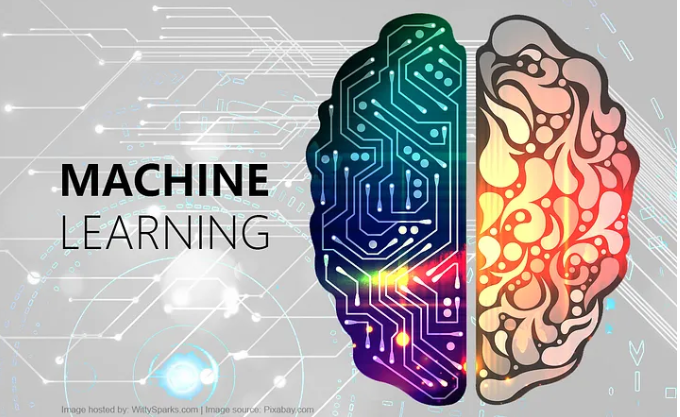

In [20]:
# Splitting the features and targets

x=df[['sepal_length','sepal_width','petal_length','petal_width']]
y=df['species']

In [21]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

In [23]:
### Importing the dependencies
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [24]:
### Machine Learning models Libraries: 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import KFold,cross_val_score 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=3)

In [26]:
print(x.shape,x_train.shape,x_test.shape)

(149, 4) (119, 4) (30, 4)


### Accuracy Score

In [27]:
models = [LogisticRegression(max_iter=1000),DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier()]

In [38]:
def compare_models_train_test():
    for model in models:
        model.fit(x_train,y_train)
        y_predicted = model.predict(x_test)
        accuracy = accuracy_score(y_test,y_predicted)
        print("Accuracy of the ",model,"=",accuracy)
        print("="*100)

In [39]:
compare_models_train_test()

Accuracy of the  LogisticRegression(max_iter=1000) = 0.9666666666666667
Accuracy of the  DecisionTreeClassifier() = 0.9
Accuracy of the  RandomForestClassifier() = 0.9
Accuracy of the  KNeighborsClassifier() = 0.9666666666666667


## Cross Validation

In [30]:
models = [LogisticRegression(max_iter=1000),DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier()]

In [40]:
def compare_models_cv():
    for model in models:
        cv_score =cross_val_score(model,x,y,cv=5)
        mean_accuracy = sum(cv_score)/len(cv_score)
        mean_accuracy= mean_accuracy*100
        mean_accuracy = round(mean_accuracy,2) 
        print("cv_score of the",model,"=",cv_score)
        print("mean_accuracy % of the",model,"=",mean_accuracy,"%")
        print("="*100)

In [41]:
compare_models_cv()

cv_score of the LogisticRegression(max_iter=1000) = [0.96666667 1.         0.93333333 0.96666667 1.        ]
mean_accuracy % of the LogisticRegression(max_iter=1000) = 97.33 %
cv_score of the DecisionTreeClassifier() = [0.96666667 0.96666667 0.9        0.96666667 1.        ]
mean_accuracy % of the DecisionTreeClassifier() = 96.0 %
cv_score of the RandomForestClassifier() = [0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
mean_accuracy % of the RandomForestClassifier() = 96.0 %
cv_score of the KNeighborsClassifier() = [0.96666667 1.         0.93333333 0.96666667 1.        ]
mean_accuracy % of the KNeighborsClassifier() = 97.33 %


In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

tuned_results = []

for idx, model in enumerate(models):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Specify average='micro' for multiclass classification
    precision = precision_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    f1 = f1_score(y_test, y_pred, average='micro')
    
    # Specify either 'ovo' (one-vs-one) or 'ovr' (one-vs-rest) for multi_class
    roc_auc = roc_auc_score(y_test, model.predict_proba(x_test), multi_class='ovr')
    
    tuned_results.append([f'Model_{idx}', accuracy, precision, recall, f1, roc_auc])


In [36]:
columns = ['Models', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']


In [37]:
# Step 8: Compare Tuned Models
tuned_results_df = pd.DataFrame(tuned_results, columns=columns)

print(tuned_results_df)

    Models  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Model_0  0.966667   0.966667  0.966667  0.966667  1.000000
1  Model_1  0.933333   0.933333  0.933333  0.933333  0.946591
2  Model_2  0.900000   0.900000  0.900000  0.900000  0.980644
3  Model_3  0.966667   0.966667  0.966667  0.966667  0.998220


## Conclusion :- 
"Among the models evaluated for iris flower classification, Logistic Regression outperforms others based on cross-validation score, accuracy, precision, recall, F1 score, and ROC AUC. Its superior performance indicates Logistic Regression as the most suitable choice for accurate classification of iris flower species."